In this task we will look at the cifar10 dataset and train a simple classifier on it. The dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. More information can be found at https://www.cs.toronto.edu/~kriz/cifar.html

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load the dataset
cifar10 = keras.datasets.cifar10


Let's take a look at some of the images in the dataset.

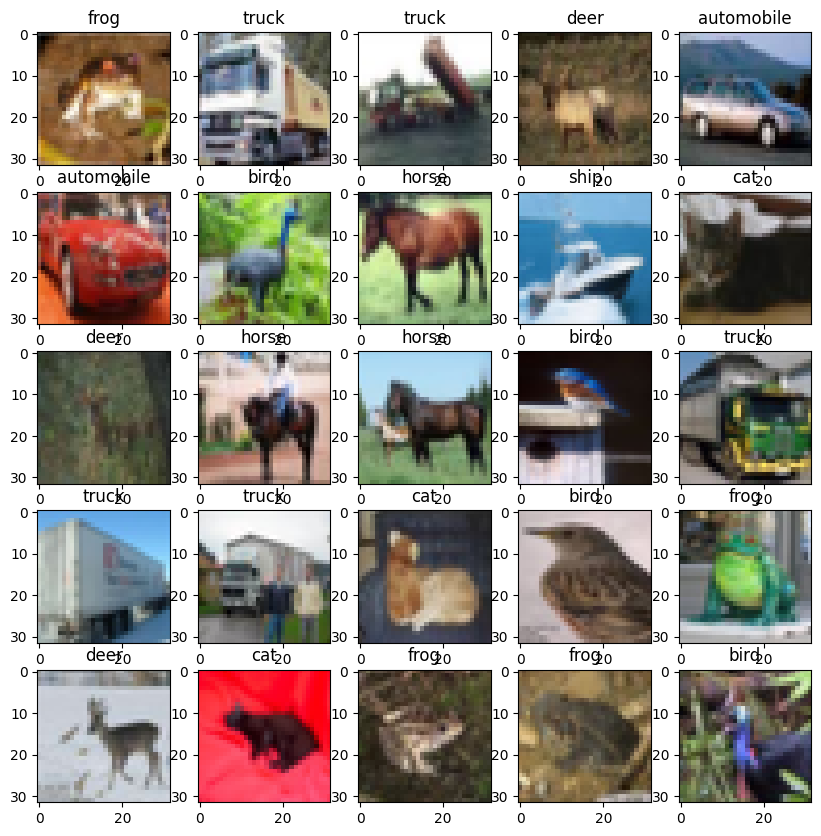

In [16]:
#visualize the dataset
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
labels_map = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(labels_map[y_train[i][0]])

Since this data has been well curated, we can simply reshape the data for input into our neural network

In [34]:
# Reshape and scale the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


Build the initial model, using fully connected layers. As we start experimenting with the model, we will use 2 hidden layers, and 1 output layer. The input layer will be the flattened image, and the output layer will be a softmax layer with 10 outputs, one for each class.

We will use the Adam optimizer, and the categorical cross entropy loss function. We will also use accuracy as a metric to monitor.

Epoch 1/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.8311 - accuracy: 0.3581 - val_loss: 1.6645 - val_accuracy: 0.4075
Epoch 2/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.5825 - accuracy: 0.4396 - val_loss: 1.5791 - val_accuracy: 0.4381
Epoch 3/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4920 - accuracy: 0.4710 - val_loss: 1.5545 - val_accuracy: 0.4479
Epoch 4/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4352 - accuracy: 0.4904 - val_loss: 1.5303 - val_accuracy: 0.4639
Epoch 5/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.3865 - accuracy: 0.5080 - val_loss: 1.5094 - val_accuracy: 0.4707
Epoch 6/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.3488 - accuracy: 0.5186 - val_loss: 1.4957 - val_accuracy: 0.4791
Epoch 7/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.3115 - accuracy: 0.5340 - val_loss: 1.5103 - val_accuracy:

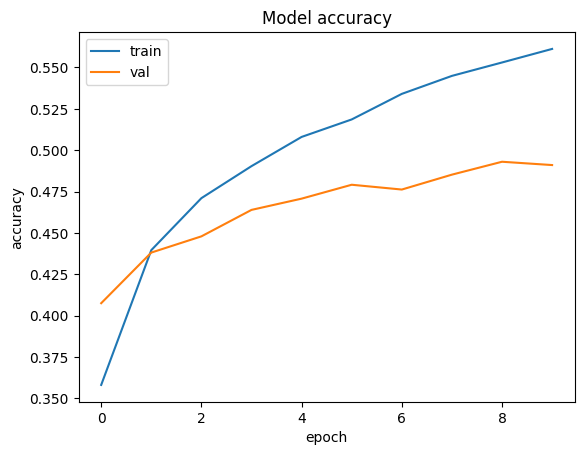

In [40]:
# Build the neural network model
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(32 * 32 * 3,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
batch_size = 32
epochs = 10

history = model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

#plot the learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We'll now try with more units to the hidden layers. Seeing as we are diverging away from the training accuracy, we'll also add a dropout layer to the model in the hopes of reducing overfitting.

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8588 - accuracy: 0.3570 - val_loss: 1.6446 - val_accuracy: 0.4216
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6211 - accuracy: 0.4258 - val_loss: 1.5743 - val_accuracy: 0.4486
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5425 - accuracy: 0.4523 - val_loss: 1.5386 - val_accuracy: 0.4547
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4943 - accuracy: 0.4704 - val_loss: 1.5257 - val_accuracy: 0.4672
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4521 - accuracy: 0.4854 - val_loss: 1.4758 - val_accuracy: 0.4857
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4127 - accuracy: 0.5004 - val_loss: 1.4682 - val_accuracy: 0.4904
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3762 - accuracy: 0.5128 - val_loss: 1.4580 - val_accuracy:

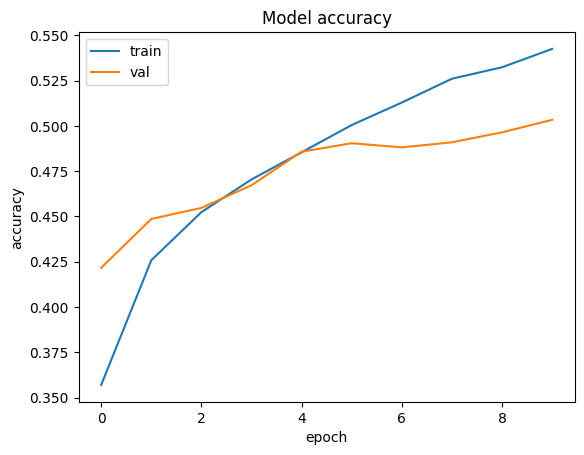

In [41]:
# Build the neural network model
model = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(32 * 32 * 3,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
batch_size = 32
epochs = 10

history = model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_scaled, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

#plot the learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The accuracy is still pretty low, so we'll now try with more hidden layers. We'll add 2 more hidden layers, with 512 units each. 

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7886 - accuracy: 0.3691 - val_loss: 1.6783 - val_accuracy: 0.3965
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5862 - accuracy: 0.4412 - val_loss: 1.5531 - val_accuracy: 0.4407
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5088 - accuracy: 0.4650 - val_loss: 1.5125 - val_accuracy: 0.4655
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4424 - accuracy: 0.4897 - val_loss: 1.5074 - val_accuracy: 0.4656
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4029 - accuracy: 0.5052 - val_loss: 1.4485 - val_accuracy: 0.4892
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3512 - accuracy: 0.5246 - val_loss: 1.4804 - val_accuracy: 0.4890
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3108 - accuracy: 0.5358 - val_loss: 1.4400 - val_a

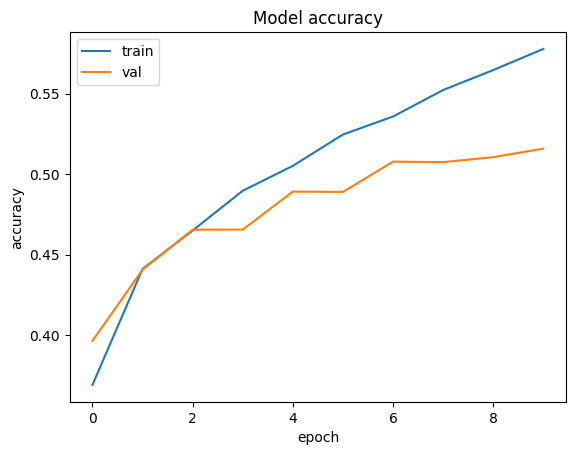

In [42]:

model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
batch_size = 32
epochs = 10

history = model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_scaled, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

#plot the learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Looking at the training accuracy, we can see that this particular model is probably not going to be any more accurate despite the number of layers and units. We'll now try with a convolutional neural network.

Epoch 1/20
625/625 [==============================] - 7s 10ms/step - loss: 1.5661 - accuracy: 0.4433 - val_loss: 1.3062 - val_accuracy: 0.5356
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 1.1673 - accuracy: 0.5907 - val_loss: 1.0923 - val_accuracy: 0.6257
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 1.0157 - accuracy: 0.6476 - val_loss: 1.0084 - val_accuracy: 0.6532
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9319 - accuracy: 0.6752 - val_loss: 1.0157 - val_accuracy: 0.6503
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.8602 - accuracy: 0.7017 - val_loss: 0.9705 - val_accuracy: 0.6639
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.8066 - accuracy: 0.7195 - val_loss: 0.9446 - val_accuracy: 0.6806
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.7575 - accuracy: 0.7366 - val_loss: 0.9295 - val_accuracy: 0.6859
Epoc

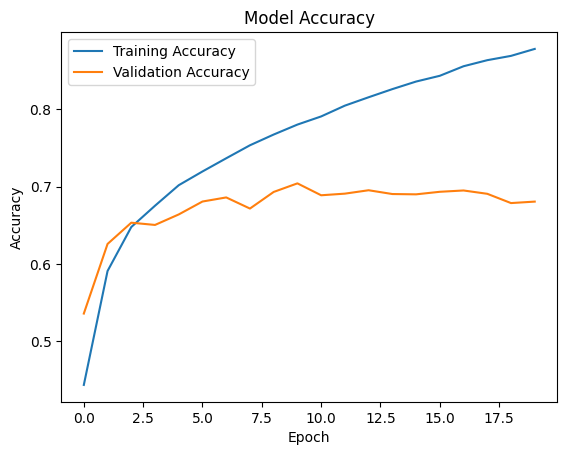

In [51]:
# Load the CIFAR-10 dataset
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Build the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()